In [1]:
import torch
import pandas as pd

In [2]:
cd ..

/home/yann/IVISpaces


In [5]:
FBNN={'boston': {('FBNN', 'RMSE'): 2.378, ('FBNN', 'LPP'): -2.301},
      'concrete': {('FBNN', 'RMSE'): 4.935, ('FBNN', 'LPP'): -3.096},
      'energy': {('FBNN', 'RMSE'): 0.412, ('FBNN', 'LPP'): -0.684},
      'wine': {('FBNN', 'RMSE'): 0.673, ('FBNN', 'LPP'): -1.040},
      'yacht': {('FBNN', 'RMSE'): 0.607, ('FBNN', 'LPP'): -1.033},
     'navalC':{('FBNN', 'RMSE'): 0.00012, ('FBNN', 'LPP'): 7.130},
     'protein':{('FBNN', 'RMSE'): 4.326, ('FBNN', 'LPP'): -2.892},
       'kin8nm':{('FBNN', 'RMSE'): float('Nan'), ('FBNN', 'LPP'): float('Nan')},
       'powerplant':{('FBNN', 'RMSE'): float('Nan'), ('FBNN', 'LPP'): float('Nan')}

     }
sFBNN={'boston': {('FBNN', 'RMSE'): 0.104, ('FBNN', 'LPP'): 0.038},
      'concrete': {('FBNN', 'RMSE'): 0.180, ('FBNN', 'LPP'): 0.016},
      'energy': {('FBNN', 'RMSE'): 0.017, ('FBNN', 'LPP'): 0.020},
      'wine': {('FBNN', 'RMSE'): 0.014, ('FBNN', 'LPP'): 0.013},
      'yacht': {('FBNN', 'RMSE'): 0.068, ('FBNN', 'LPP'): 0.033},
      'navalC':{('FBNN', 'RMSE'): 0.0000, ('FBNN', 'LPP'): 0.024},
     'protein':{('FBNN', 'RMSE'): 0.019, ('FBNN', 'LPP'): 0.004},
       'kin8nm':{('FBNN', 'RMSE'): float('Nan'), ('FBNN', 'LPP'): float('Nan')},
       'powerplant':{('FBNN', 'RMSE'): float('Nan'), ('FBNN', 'LPP'): float('Nan')}

     }

# Exp 2: Metric on test #

In [35]:
RESULTS, STDS=torch.load('Results/NEW/UCI_splits2020-10-09-14:47.pt')
#RESULTS, STDS=torch.load('Results/NEW/UCI_splits_large2020-10-14-03:26.pt')
#RESULTS, STDS=torch.load('Results/NEW/UCI_splits2020-10-08-21:47.pt')

#torch.load('Results/NEW/UCI_splits2020-10-08-11:20.pt')
#RESULTS_, STDS_=torch.load('Results/NEW/UCI_splits2020-10-07-23:14.pt')#
#RESULTS_data, _=torch.load('Results/NEW/UCI_splits2020-10-07-12:17.pt')

for key in RESULTS.keys():
    print(key)

boston
concrete
energy
wine
yacht


In [36]:
for dataset in RESULTS.keys():
    RESULTS[dataset].update(FBNN[dataset])
    #RESULTS[dataset].update(RESULTS_[dataset])

for dataset in STDS.keys():
    STDS[dataset].update(sFBNN[dataset])

In [37]:
res=pd.DataFrame(RESULTS).transpose()

In [38]:
stds=pd.DataFrame(STDS).transpose()

In [39]:
res

MFVI                                                      \
              RMSE       LPP      gLPP       WAIC      PICP       MPIW   
boston    3.695909 -2.969097 -3.134978  -4.721308  0.884314   9.386144   
concrete  5.425138 -3.120578 -3.125658  -3.248775  0.921359  19.321183   
energy    0.459933 -0.665691 -0.659798  -0.802359  0.929870   1.841778   
wine      0.644992 -0.980808 -0.984918  -1.034778  0.938125   2.433793   
yacht     0.790876 -3.348156 -4.349404 -20.195094  0.777419   1.221575   

                                 GeNNeVI            ... EnsembleB            \
            time [s] std noise      RMSE       LPP  ...      RMSE       LPP   
boston    115.576505  0.238663  3.729116 -4.342258  ...  3.468495 -8.048740   
concrete  226.411172  0.284631  4.480183 -3.165348  ...  4.180178 -6.065691   
energy    191.095512  0.043962  0.451816 -0.610699  ...  0.413280 -2.694180   
wine      282.485393  0.756951  0.721242 -1.342054  ...  0.646656 -3.427585   
yacht      85.935307  0.017707  0.651676 -0.976040  ...  0.631832 -8.465678   

                                                                    FBNN  \
              gLPP WAIC      PICP      MPIW    time [s] std noise   RMSE   
boston   -8.048740  NaN  0.733333  7.114121  189.227949       0.0  2.378   
concrete -6.065691  NaN  0.763107  8.490820  365.648052       0.0  4.935   
energy   -2.694180  NaN  0.724675  0.857947  273.195542       0.0  0.412   
wine     -3.427585  NaN  0.731875  1.474181  556.484174       0.0  0.673   
yacht    -8.465678  NaN  0.922581  1.766829  115.531024       0.0  0.607   

                 
            LPP  
boston   -2.301  
concrete -3.096  
energy   -0.684  
wine     -1.040  
yacht    -1.033  

[5 rows x 58 columns]

In [17]:
methods=['McDropOut','EnsembleB','MFVI','FuNNeMFVI','GeNNeVI','FuNNeVI']#,'FBNN']#'EnsembleB',,'FuNNeVI-GP']#,'FBNN']#['FuNNeVI',]##
metrics=['time [s]']#['RMSE']#,
#metrics=['LPP']#['RMSE']##['RMSE']#,'LPP']
index=pd.MultiIndex.from_product([methods,metrics])#, names=['method', 'metric']


# Defining custom function  
# which returns the list for 
# df.style.apply() method 
def boldface_min(s):  
    is_min = s == s.min()       
    return ['font-weight: bold' if cell else '' for cell in is_min] 
def boldface_max(s):  
    is_max = s == s.max()       
    return ['font-weight: bold' if cell else '' for cell in is_max] 



#final=res[index].style.apply(boldface_min,subset=[(method,'RMSE') for method in methods], axis=1)
#final=res[index].style.apply(boldface_max,subset=[(method,'LPP') for method in methods], axis=1)
#final=res[index]#\
#
res[index]
#final
#res[index]

,McDropOut,EnsembleB,MFVI,FuNNeMFVI,GeNNeVI,FuNNeVI
,time [s],time [s],time [s],time [s],time [s],time [s]
kin8nm,126.032009,144.374765,183.339958,174.124518,93.491064,134.718955
navalC,186.782000,212.406981,574.004563,295.992958,199.049133,433.124067
powerplant,149.263306,177.398570,153.421343,164.104009,93.414148,148.911573
protein,776.676829,825.396006,912.133060,1079.566188,504.023050,890.191898


In [40]:
methods=['McDropOut','EnsembleB','MFVI','FuNNeMFVI','GeNNeVI','FuNNeVI']#,'FBNN']#'EnsembleB',,'FuNNeVI-GP']#,'FBNN']#['FuNNeVI',]##
metrics=['time [s]']
#metrics=['LPP']#['RMSE']##['RMSE']#,'LPP']
index=pd.MultiIndex.from_product([methods,metrics])#, 

In [41]:
res[index].round(0)

,McDropOut,EnsembleB,MFVI,FuNNeMFVI,GeNNeVI,FuNNeVI
,time [s],time [s],time [s],time [s],time [s],time [s]
boston,11.0,189.0,116.0,203.0,79.0,136.0
concrete,17.0,366.0,226.0,280.0,156.0,248.0
energy,13.0,273.0,191.0,217.0,96.0,242.0
wine,25.0,556.0,282.0,513.0,283.0,440.0
yacht,8.0,116.0,86.0,90.0,47.0,71.0


In [42]:
res_=res.copy()

In [44]:
#methods=['MFVI','GeNNeVI','FuNNeVI','FuNNeVI-GP','FBNN']#['FuNNeVI','FuNNeVI-GP']
#metrics=['RMSE','LPP']
#index=pd.MultiIndex.from_product([methods,metrics])#, names=['method', 'metric']


import numpy as np
for i in res[index].columns:
   # res_[i] = res[i].round(3).astype(str)+ "±" + ((stds[i]/np.sqrt(5)).round(2)).astype(str)+""
    res_[i] = res[i].round().astype(str)

In [45]:
print(res_[index].to_latex())

\begin{tabular}{lllllll}
\toprule
{} & McDropOut & EnsembleB &     MFVI & FuNNeMFVI &  GeNNeVI &  FuNNeVI \\
{} &  time [s] &  time [s] & time [s] &  time [s] & time [s] & time [s] \\
\midrule
boston   &      11.0 &     189.0 &    116.0 &     203.0 &     79.0 &    136.0 \\
concrete &      17.0 &     366.0 &    226.0 &     280.0 &    156.0 &    248.0 \\
energy   &      13.0 &     273.0 &    191.0 &     217.0 &     96.0 &    242.0 \\
wine     &      25.0 &     556.0 &    282.0 &     513.0 &    283.0 &    440.0 \\
yacht    &       8.0 &     116.0 &     86.0 &      90.0 &     47.0 &     71.0 \\
\bottomrule
\end{tabular}



# Entropy HMC Experiment 1 #

In [5]:
Entropy=torch.load('Results/NEW/UCI_ENTROPY_Fixed_Noise2020-10-13-17:20.pt')


In [6]:
methods=['HMC','GeNNeVI','FuNNeVI']#'EnsembleB',,'FuNNeVI-GP']#,'FBNN']#['FuNNeVI',]##
datasets=['boston', 'concrete', 'energy', 'wine', 'yacht']
index=pd.MultiIndex.from_product([methods,datasets])#, names=['method', 'metric']


df=pd.DataFrame(data=Entropy, index=methods)
Entropy=df.to_dict()


/home/yann/anaconda3/envs/bnn/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


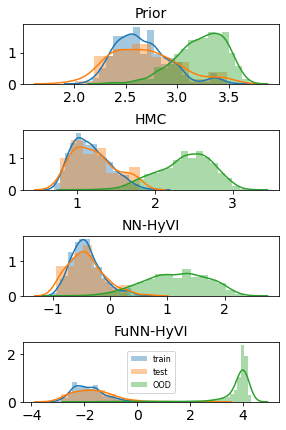

In [11]:
from Models import GaussianProcess
from Experiments import get_setup
from Models import get_mlp
from torch import nn
from Metrics import BatchEntropy


import seaborn as sns
from pylab import *

#predictive model
layerwidth=50
nblayers=1
activation=nn.ReLU()

device =torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

parameters = {'axes.labelsize':14,
              'axes.titlesize': 14,
              'xtick.labelsize' : 14,
              'ytick.labelsize' : 14,
              'figure.titlesize':14}
plt.rcParams.update(parameters)
method_names=['HMC','NN-HyVI','FuNN-HyVI']

n_datasets=5
n_methods=len(method_names)+1
fig,ax=plt.subplots(n_methods,1,figsize=(4,6),squeeze=False)

GPprior=GaussianProcess(mean=torch.tensor(0.),lengthscale=1., noise=0.1)    

def OOD_sampler(x_train,n_ood):
    M = x_train.max(0, keepdim=True)[0]
    m = x_train.min(0, keepdim=True)[0]
    X = torch.rand(n_ood,x_train.shape[1]).to(device) * (M-m) + m                           
    return X

def EntropyKDE(ax, theta, X,  model, label):
    Y=[model(X[i],theta) for i in range(len(X))]
    H=[BatchEntropy(y.transpose(0,1),k=30) for y in Y]
    for i in range(len(H)):
        ax=sns.distplot(H[i].cpu(), label=label[i], ax=ax)

label=['train', 'test', 'OOD']
dataset, dic ='concrete', Entropy['concrete']
m=0
setup_ = get_setup(dataset)
setup=setup_.Setup(device)
x_train, y_train=setup.train_data()
x_test, y_test=setup.test_data()


input_dim=x_train.shape[1]
param_count, model = get_mlp(input_dim, layerwidth, nblayers, activation) 
prior_theta=0.5*torch.randn(1000,param_count).to(device)

X=[x_train,x_test,OOD_sampler(x_train,1000)]
Y=[model(x,prior_theta) for x in X]

H=[BatchEntropy(y.transpose(0,1),k=30) for y in Y]

ax_=ax.flat
for i in range(len(H)):
    sns.distplot(H[i].cpu(), label=label[i], ax=ax_[m])
#ax_[0].set_ylabel('Prior',{'fontstyle':'italic'})
ax_[0].set_title('Prior')

#ax_[m].set_title(dataset)

m+=1
for method, HR in dic.items():
    theta=HR[1]
    EntropyKDE(ax_[m], theta, X, model, label)
    if method=='FuNNeVI' or method== 'GeNNeVI':
        #ax_[m].set_ylabel(method, {'fontweight':'bold'})
        ax_[m].set_title(method_names[m-1])
    else:
        #ax_[m].set_ylabel(method)
        ax_[m].set_title(method_names[m-1])

    m+=1

#handles, labels = ax_[0].get_legend_handles_labels()

#fig.legend(handles, labels, title='input distribution',title_fontsize=10,  loc=(.75,0.1),prop={'size': 10})
ax_[m-1].legend(loc='center', prop={'size': 8})
fig.tight_layout(pad=0.8)
fig.align_ylabels(ax[:, 0])
plt.savefig("Results/NEW/UCI_Entropy.pdf", dpi=600)

plt.show()

/home/yann/anaconda3/envs/bnn/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


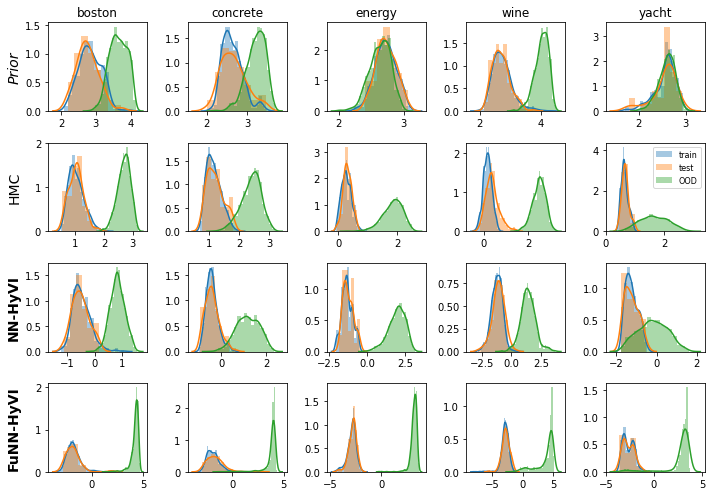

In [12]:
from Models import GaussianProcess
from Experiments import get_setup
from Models import get_mlp
from torch import nn
from Metrics import BatchEntropy


import seaborn as sns
from pylab import *

#predictive model
layerwidth=50
nblayers=1
activation=nn.ReLU()

device =torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

parameters = {'axes.labelsize':14,
              'axes.titlesize': 12,
              'xtick.labelsize' : 10,
              'ytick.labelsize' : 10,
              'figure.titlesize':14}
plt.rcParams.update(parameters)
method_names=['HMC','NN-HyVI','FuNN-HyVI']

n_datasets=5
n_methods=len(method_names)+1
fig,ax=plt.subplots(n_methods,n_datasets,figsize=(10,7),squeeze=False)

GPprior=GaussianProcess(mean=torch.tensor(0.),lengthscale=1., noise=0.1)    

def OOD_sampler(x_train,n_ood):
    M = x_train.max(0, keepdim=True)[0]
    m = x_train.min(0, keepdim=True)[0]
    X = torch.rand(n_ood,x_train.shape[1]).to(device) * (M-m) + m                           
    return X

def EntropyKDE(ax, theta, X,  model, label):
    Y=[model(X[i],theta) for i in range(len(X))]
    H=[BatchEntropy(y.transpose(0,1),k=30) for y in Y]
    for i in range(len(H)):
        ax=sns.distplot(H[i].cpu(), label=label[i], ax=ax)

label=['train', 'test', 'OOD']

d=0
for dataset, dic in Entropy.items():# ='boston', Entropy['boston']
    m=0

    setup_ = get_setup(dataset)
    setup=setup_.Setup(device)
    x_train, y_train=setup.train_data()
    x_test, y_test=setup.test_data()


    input_dim=x_train.shape[1]
    param_count, model = get_mlp(input_dim, layerwidth, nblayers, activation) 
    prior_theta=0.5*torch.randn(1000,param_count).to(device)

    X=[x_train,x_test,OOD_sampler(x_train,1000)]
    Y=[model(x,prior_theta) for x in X]

    H=[BatchEntropy(y.transpose(0,1),k=30) for y in Y]

    for i in range(len(H)):
        sns.distplot(H[i].cpu(), label=label[i], ax=ax[0,d])
    ax[0,0].set_ylabel('Prior',{'fontstyle':'italic'})
    #ax_[0].set_title('Prior')

    ax[0,d].set_title(dataset)

    m+=1
    for method, HR in dic.items():
        theta=HR[1]
        EntropyKDE(ax[m,d], theta, X, model, label)
        if d==0:
            if method=='FuNNeVI' or method== 'GeNNeVI':
                ax[m,d].set_ylabel(method_names[m-1], {'fontweight':'bold'})
            else:
                ax[m,d].set_ylabel(method_names[m-1])

        m+=1
    d+=1
ax[1,d-1].legend(loc='upper right', prop={'size': 8})
fig.tight_layout()
fig.align_ylabels(ax[:, 0])
plt.savefig("Results/NEW/UCI_Entropy.pdf", dpi=600)

plt.show()

# Exp 1: Predictive Epistemic Entropy #

In [13]:
#Entropy_=torch.load('Results/NEW/UCI_ENTROPY2020-10-13-21:22.pt')#, map_location=torch.device('cpu'))
#Entropy=torch.load('Results/NEW/UCI_ENTROPY2020-10-08-12:13.pt')
Entropy=torch.load('Results/NEW/UCI_PredictiveEntropyExp2.pt')


/home/yann/anaconda3/envs/bnn/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
methods=['McDropOut','EnsembleB','MFVI','FuNNeMFVI','GeNNeVI','FuNNeVI']#'EnsembleB',,'FuNNeVI-GP']#,'FBNN']#['FuNNeVI',]##
datasets=['boston', 'concrete', 'energy','wine', 'yacht']
#metrics=['RMSE','LPP']
index=pd.MultiIndex.from_product([methods,datasets])#, names=['method', 'metric']


df=pd.DataFrame(data=Entropy, index=methods, columns=datasets)
Entropy=df.to_dict()
Entropy_good=Entropy.copy()


In [10]:
import math
from Metrics import BatchEntropy
# def BatchEntropy(theta,k=1,k_MC=1,device='cpu'):
#     """
#     Parameters:
#         theta (Tensor): Samples, Batch x NbExemples X NbDimensions
#         k (Int): ordinal number

#     Returns:
#         Tensor: H of size Batch x 1, k-Nearest Neighbour Estimation of the entropy of theta, H[b]=H(theta[b]).

#     """
#     batch=theta.shape[0]
#     nb_samples=theta.shape[1]
#     d=torch.tensor(theta.shape[-1]).float()
#     D=torch.cdist(theta,theta)
#     a = torch.topk(D, k=k+1, dim=1, largest=False, sorted=True)[0][:,k].log().sum(1)
#     while a.isinf().sum():
#         print(k)
#         k+=1
#         a = torch.topk(D, k=k+1, dim=1, largest=False, sorted=True)[0][:,k].log().sum(1)
#     K=torch.as_tensor(float(k), device=device)
#     K_MC=torch.as_tensor(float(k_MC), device=device)
#     N=torch.as_tensor(float(nb_samples), device=device)
#     pi=torch.as_tensor(math.pi, device=device)
#     lcd = d/2.*pi.log() - torch.lgamma(1. + d/2.0)-d/2*K_MC.log()
#     H=torch.log(N) - torch.digamma(K) + lcd + d/nb_samples*a
#     return H

for m in methods:
    for d in ['wine', 'yacht']:
        Y=Entropy[d][m]
        H=[BatchEntropy(Y[0].transpose(0,1),k=30),BatchEntropy(Y[1].transpose(0,1),k=30),BatchEntropy(Y[2].transpose(0,1),k=30)]

        Entropy[d].update({m:H})
# m=methods[3]
# d=datasets[0]
# 

# print([y.shape for y in Y])
# if m==methods[3] and d==datasets[0]:
#     H=[BatchEntropy(Y[0].transpose(0,1).cpu(),k=500),BatchEntropy(Y[1].transpose(0,1),k=500),BatchEntropy(Y[2].transpose(0,1).cpu(),k=100)]
# else: 
#     H=[BatchEntropy(Y[0].transpose(0,1),k=30),BatchEntropy(Y[1].transpose(0,1),k=30),BatchEntropy(Y[2].transpose(0,1),k=30)]
# Entropy_good[d].update({m:H})
                                                                    
# for y in Entropy['wine']['McDropOut']:
#     print(y.shape)

/home/yann/anaconda3/envs/bnn/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


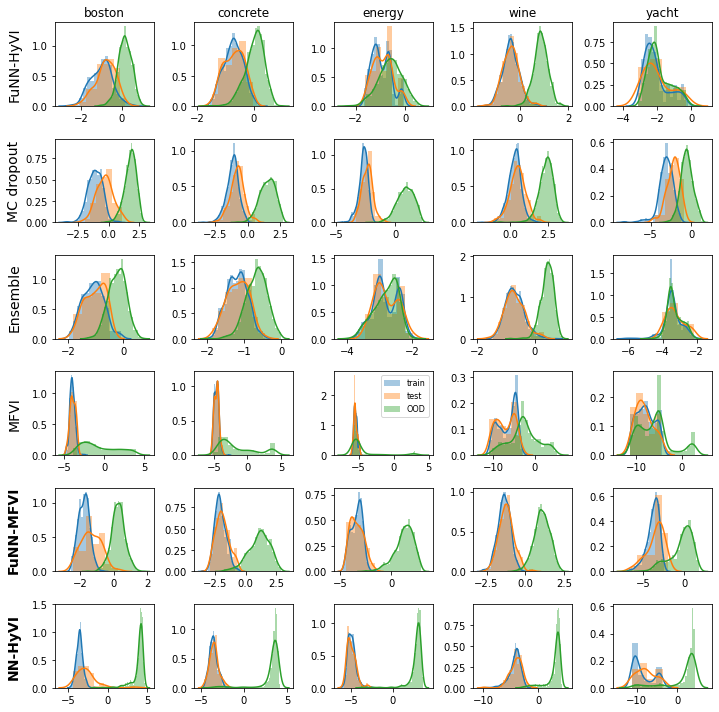

In [17]:
from Models import GaussianProcess
from Experiments import get_setup
from Models import get_mlp
from torch import nn
from Metrics import BatchEntropy


import seaborn as sns
from pylab import *

#predictive model
layerwidth=50
nblayers=1
activation=nn.ReLU()

device =torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

parameters = {'axes.labelsize':14,
              'axes.titlesize': 12,
              'xtick.labelsize' : 10,
              'ytick.labelsize' : 10,
              'figure.titlesize':14}
plt.rcParams.update(parameters)

n_datasets=len(datasets)
n_methods=len(methods)
fig,ax=plt.subplots(n_methods,n_datasets,figsize=(10,10),squeeze=False)

GPprior=GaussianProcess(mean=torch.tensor(0.),lengthscale=1., noise=0.1)    

method_names=['MC dropout','Ensemble','MFVI','FuNN-MFVI','NN-HyVI','FuNN-HyVI']

label=['train', 'test', 'OOD']
d=0
for dataset, dic in Entropy.items():
    m=0
    ax[m,d].set_title(dataset)
    for method, H in dic.items():
        for i in range(len(H)):
            #print("{}, {}: {}".format(dataset, method,H[i].isinf().sum().item()))
            sns.distplot(H[i].cpu(), label=label[i], ax=ax[m,d], kde=True)#, color=colors[i])#, hist=False, norm_hist=True)#color=colors[i],
            if d ==0:
                if method=='FuNNeVI' or method== 'GeNNeVI':
                    ax[m,d].set_ylabel(method_names[m-1], {'fontweight':'bold'})
                else:
                    ax[m,d].set_ylabel(method_names[m-1])
        m+=1
        
    d+=1
ax[3,2].legend(loc='upper right', prop={'size': 8})#bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
fig.tight_layout()
fig.align_ylabels(ax[:, 0])
plt.savefig("Results/NEW/UCI_PredictiveEntropy_Exp2.pdf", dpi=600)
#plt.subplots_adjust(top=.9)
#plt.suptitle('Posterior Predictive Entropy Distributions')
plt.show()

# Exp 1: Results  #

In [24]:
import torch
import pandas as pd

RESULTS, DIV, PDIV, H=torch.load('Results/NEW/UCI_HMC2020-10-11-19:31.pt')

H[0]#[('FuNNeVI','KL(-,HMC)')]

{'boston': {('FuNNeVI', 'paramH'): 419.8688557942708,
  ('FuNNeVI', 'funH'): 317.3030192057292,
  ('GeNNeVI', 'paramH'): 1563.6720377604167,
  ('GeNNeVI', 'funH'): -412.63881429036456,
  ('HMC', 'paramH'): 971.166259765625,
  ('HMC', 'funH'): -51.2349853515625},
 'concrete': {('FuNNeVI', 'paramH'): 332.14923095703125,
  ('FuNNeVI', 'funH'): 272.7926025390625,
  ('GeNNeVI', 'paramH'): 1088.3623860677083,
  ('GeNNeVI', 'funH'): -435.2921956380208,
  ('HMC', 'paramH'): 636.6245727539062,
  ('HMC', 'funH'): -106.06379699707031},
 'energy': {('FuNNeVI', 'paramH'): 223.0023396809896,
  ('FuNNeVI', 'funH'): 145.50577290852866,
  ('GeNNeVI', 'paramH'): 1086.4571126302083,
  ('GeNNeVI', 'funH'): -243.49998982747397,
  ('HMC', 'paramH'): 627.4904174804688,
  ('HMC', 'funH'): -225.31210327148438},
 'wine': {('FuNNeVI', 'paramH'): -1506.8634847005208,
  ('FuNNeVI', 'funH'): 278.1590983072917,
  ('GeNNeVI', 'paramH'): 1412.2006429036458,
  ('GeNNeVI', 'funH'): -250.32719930013022,
  ('HMC', 'paramH

In [19]:
methods=['HMC','GeNNeVI','FuNNeVI']#torch.distributions.kl.kl_divergence(middle,certain)#'EnsembleB',,'FuNNeVI-GP']#,'FBNN']#['FuNNeVI',]##
datasets=['boston', 'concrete', 'energy', 'wine', 'yacht']
metrics=['RMSE','LPP']
index=pd.MultiIndex.from_product([methods,metrics])#, names=['method', 'metric']
index_rmse=pd.MultiIndex.from_product([methods,['RMSE']])
index_lpp=pd.MultiIndex.from_product([methods,['LPP']])

# for dataset in datasets:
#     for method in methods:
#         DIV[0][dataset].update({(method,'sKL(-,HMC)'):DIV[0][dataset][(method,'KL(-,HMC)')]+DIV[0][dataset][(method,'KL(HMC,-)')]})
#         PDIV[0][dataset].update({(method,'sKL(-,HMC)'):PDIV[0][dataset][(method,'KL(-,HMC)')]+PDIV[0][dataset][(method,'KL(HMC,-)')]})

In [20]:
df_rmse=pd.DataFrame(RESULTS[0], index=index_rmse).transpose()
df_rmse_std=pd.DataFrame(RESULTS[1], index=index_rmse).transpose()
df_lpp=pd.DataFrame(RESULTS[0], index=index_lpp).transpose()
df_lpp_std=pd.DataFrame(RESULTS[1], index=index_lpp).transpose()


In [21]:
import numpy as np

for i in df_rmse.columns:
    df_rmse[i] = df_rmse[i].round(3).astype(str)+ "±" + ((df_rmse_std[i]/np.sqrt(3)).round(3)).astype(str)+""
for i in df_lpp.columns:
    df_lpp[i] = df_lpp[i].round(3).astype(str)+ "±" + ((df_lpp_std[i]/np.sqrt(3)).round(5)).astype(str)+""
    

In [83]:
df=pd.concat([df_rmse,df_lpp],axis=1)

In [84]:
print(df.to_latex())

\begin{tabular}{lllllll}
\toprule
{} &        HMC &      GeNNeVI &      FuNNeVI &         HMC &         GeNNeVI &         FuNNeVI \\
{} &       RMSE &         RMSE &         RMSE &         LPP &             LPP &             LPP \\
\midrule
boston   &  2.636±nan &  2.683±0.015 &  3.247±0.218 &  -4.113±nan &   -4.075±0.0001 &  -4.085±0.00085 \\
concrete &  7.459±nan &  6.683±0.171 &  5.481±0.314 &  -5.272±nan &  -5.252±0.00026 &  -5.252±0.00034 \\
energy   &  2.619±nan &  0.783±0.027 &  0.491±0.002 &  -3.607±nan &  -3.565±0.00018 &    -3.562±1e-05 \\
wine     &  0.583±nan &  0.682±0.019 &  0.686±0.023 &    -0.9±nan &  -1.356±0.08143 &  -1.455±0.09198 \\
yacht    &  3.853±nan &  1.389±0.072 &  1.168±0.098 &   -4.07±nan &  -4.003±0.00021 &  -4.001±0.00026 \\
\bottomrule
\end{tabular}



In [85]:
methods=['GeNNeVI','FuNNeVI']#'EnsembleB',,'FuNNeVI-GP']#,'FBNN']#['FuNNeVI',]##
datasets=['boston', 'concrete', 'energy', 'wine', 'yacht']
metrics=['KL(-,HMC)','KL(HMC,-)','KL(-,-)']#'sKL(-,HMC)']#
index=pd.MultiIndex.from_product([methods,metrics])#, names=['method', 'metric']

div=pd.DataFrame(DIV[0], index=index).transpose()
pdiv=pd.DataFrame(PDIV[0],index=index).transpose()
div_=pd.DataFrame(DIV[1], index=index).transpose()
pdiv_=pd.DataFrame(PDIV[1],index=index).transpose()
Div=div#pd.concat([pdiv,div], axis=1, keys=['parameter space','function space'])
Div_=div_#pd.concat([pdiv_,div_], axis=1, keys=['parameter space','function space'])

In [86]:
lat=Div.copy()

In [87]:
for i in Div.columns:
    lat[i] = Div[i].round(1).astype(str)+ "±" + ((Div_[i]/np.sqrt(3)).round(1)).astype(str)+""

In [88]:
print(lat.to_latex())

\begin{tabular}{lllllll}
\toprule
{} & \multicolumn{3}{l}{GeNNeVI} & \multicolumn{3}{l}{FuNNeVI} \\
{} &  KL(-,HMC) &   KL(HMC,-) &     KL(-,-) &   KL(-,HMC) &  KL(HMC,-) &    KL(-,-) \\
\midrule
boston   &   29.4±1.7 &   265.0±6.3 &    30.2±1.5 &  303.2±12.8 &  -20.1±4.9 &  20.6±10.2 \\
concrete &    5.8±0.8 &   260.2±1.6 &    26.0±4.6 &   301.0±3.9 &  -32.0±0.6 &    5.2±0.7 \\
energy   &  75.2±21.9 &  128.2±12.9 &  103.5±30.3 &   298.3±9.7 &  -22.5±2.2 &   19.8±3.3 \\
wine     &  126.3±5.6 &  377.9±15.6 &   390.3±8.9 &   244.5±4.8 &   85.5±5.2 &   47.4±7.5 \\
yacht    &   26.7±4.1 &   318.5±7.0 &    47.5±8.9 &   277.8±3.1 &   -4.7±0.8 &   16.0±1.3 \\
\bottomrule
\end{tabular}



In [25]:
#pd.DataFrame(H)
methods=['HMC','GeNNeVI','FuNNeVI']
metrics=['paramH','funH']#
index=pd.MultiIndex.from_product([methods,metrics])
df=pd.DataFrame(H[0], index=index).transpose()
for key in [('FuNNeVI', 'paramH'), ('FuNNeVI', 'funH'), ('GeNNeVI', 'paramH'), ('GeNNeVI', 'funH')]:
    H[1].pop(key)
df_std=pd.DataFrame(H[1], index=index).transpose()
# index=pd.MultiIndex.from_product([methods,['paramH']])
# param=df[index]
# index=pd.MultiIndex.from_product([methods,['funH']])
# fun=df[index]
# param
df,df_std

(                 HMC                  GeNNeVI                  FuNNeVI  \
               paramH        funH       paramH        funH       paramH   
 boston    971.166260  -51.234985  1563.672038 -412.638814   419.868856   
 concrete  636.624573 -106.063797  1088.362386 -435.292196   332.149231   
 energy    627.490417 -225.312103  1086.457113 -243.499990   223.002340   
 wine      613.734619  -27.555923  1412.200643 -250.327199 -1506.863485   
 yacht     503.212891 -245.979401   762.992716 -662.585673   148.922791   
 
                       
                 funH  
 boston    317.303019  
 concrete  272.792603  
 energy    145.505773  
 wine      278.159098  
 yacht      90.907028  ,
             HMC         GeNNeVI               FuNNeVI           
          paramH funH     paramH       funH     paramH       funH
 boston      0.0  0.0  18.807461   7.849923  42.712129  26.844679
 concrete    0.0  0.0  10.723021   3.995951  31.667764   3.383995
 energy      0.0  0.0  16.185216  14.258

In [103]:
import numpy as np
for i in df[index].columns:
    df[i] = df[i].round(0).astype(str)+ "±" + ((df_std[i]/np.sqrt(3)).round(0)).astype(str)+""

/home/yann/anaconda3/envs/bnn/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [104]:
index=pd.MultiIndex.from_product([methods,['paramH']])
param=df[index]
index=pd.MultiIndex.from_product([methods,['funH']])
fun=df[index]
df=pd.concat([param,fun], axis=1)

In [105]:
print(df.to_latex())

\begin{tabular}{lllllll}
\toprule
{} &        HMC &      GeNNeVI &       FuNNeVI &         HMC &      GeNNeVI &     FuNNeVI \\
{} &     paramH &       paramH &        paramH &        funH &         funH &        funH \\
\midrule
boston   &  971.0±0.0 &  1564.0±11.0 &    420.0±25.0 &   -51.0±0.0 &   -413.0±5.0 &  317.0±15.0 \\
concrete &  637.0±0.0 &   1088.0±6.0 &    332.0±18.0 &  -106.0±0.0 &   -435.0±2.0 &   273.0±2.0 \\
energy   &  627.0±0.0 &   1086.0±9.0 &    223.0±34.0 &  -225.0±0.0 &   -243.0±8.0 &  146.0±11.0 \\
wine     &  614.0±0.0 &  1412.0±28.0 &  -1507.0±32.0 &   -28.0±0.0 &   -250.0±9.0 &   278.0±9.0 \\
yacht    &  503.0±0.0 &    763.0±6.0 &    149.0±35.0 &  -246.0±0.0 &  -663.0±10.0 &    91.0±4.0 \\
\bottomrule
\end{tabular}



# Synthetic Data Set: Wave OOS #

In [26]:
from Experiments import get_setup
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

x_pred=torch.linspace(-4.,2.,500).unsqueeze(-1).to(device)

setup_ = get_setup('foong')
setup=setup_.Setup(device) 


x_train, y_train=setup.train_data()

def PlotFoong(ax, method, y_pred, x_pred=x_pred,  x=x_train, y=y_train, device=device):
 
    parameters = {'axes.labelsize':18,
                  'axes.titlesize': 18,
                  'xtick.labelsize' : 15,
                  'ytick.labelsize' : 15,
                  'figure.titlesize':14}


    plt.rcParams.update(parameters)
    
    N=y_pred.shape[0]
    m_3=int(0.001*N)
    M_3=N-m_3
    m_2=int(0.021*N)
    M_2=N-m_2
    m_1=int(0.136*N)
    M_1=N-m_1

    x_pred=x_pred.squeeze()

    pred,_=y_pred.sort(dim=0)
    y_mean=y_pred.mean(dim=0).squeeze().cpu()
    y_3=pred[m_3,:].squeeze().cpu()
    Y_3=pred[M_3,:].squeeze().cpu()
    y_2=pred[m_2,:].squeeze().cpu()
    Y_2=pred[M_2,:].squeeze().cpu()    
    y_1=pred[m_1,:].squeeze().cpu()
    Y_1=pred[M_1,:].squeeze().cpu()

    

    ax.plot(x_pred.cpu(), torch.cos(4.0*(x_pred+0.2)).cpu(),'--', linewidth=1., color='darkcyan')
    color='springgreen'#'darkgreen'#'dodgerblue'#
#    ax.fill_between(x_pred.cpu(), y_3, Y_3, facecolor=color, alpha=0.3)
#    ax.fill_between(x_pred.cpu(), y_2, Y_2, facecolor=color, alpha=0.2)
#    ax.fill_between(x_pred.cpu(), y_1, Y_1, facecolor=color, alpha=0.1)
    
    ax.fill_between(x_pred.cpu(), Y_2, Y_3, facecolor='springgreen', alpha=0.2)
    ax.fill_between(x_pred.cpu(), Y_1, Y_2, facecolor='springgreen', alpha=0.4)
    ax.fill_between(x_pred.cpu(), y_1, Y_1, facecolor='springgreen', alpha=0.7)
    ax.fill_between(x_pred.cpu(), y_2, y_1, facecolor='springgreen', alpha=0.4)
    ax.fill_between(x_pred.cpu(), y_3, y_2, facecolor='springgreen', alpha=0.2)

    ax.set_yticks([-3,0,3])
    ax.set_xticks([-2,-1,0,1])
    ax.grid(True, which='major', linewidth=0.5)
    ax.set_ylim(-4, 5)
    ax.set_xlim(-3.,2.)
    if method == 'NN-HyVI' or method =='FuNN-HyVI':
        ax.set_title(method, {'fontweight':'bold'})
    else:
        ax.set_title(method)
    ax.scatter(x.cpu(), y.cpu() , marker='.',linewidth=.5, color='black',zorder=4)
    ax.plot(x_pred.cpu(), y_mean, color='darkgreen', linewidth=1.)

    return fig


/home/yann/anaconda3/envs/bnn/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
Wave=torch.load('Results/NEW/WAVE_OOS2020-10-12-09:54.pt')
methods=['McDropOut','EnsembleB','MFVI','FuNNeMFVI','GeNNeVI','HMC','FuNNeVI']
#df=pd.DataFrame(Wave,index=methods)

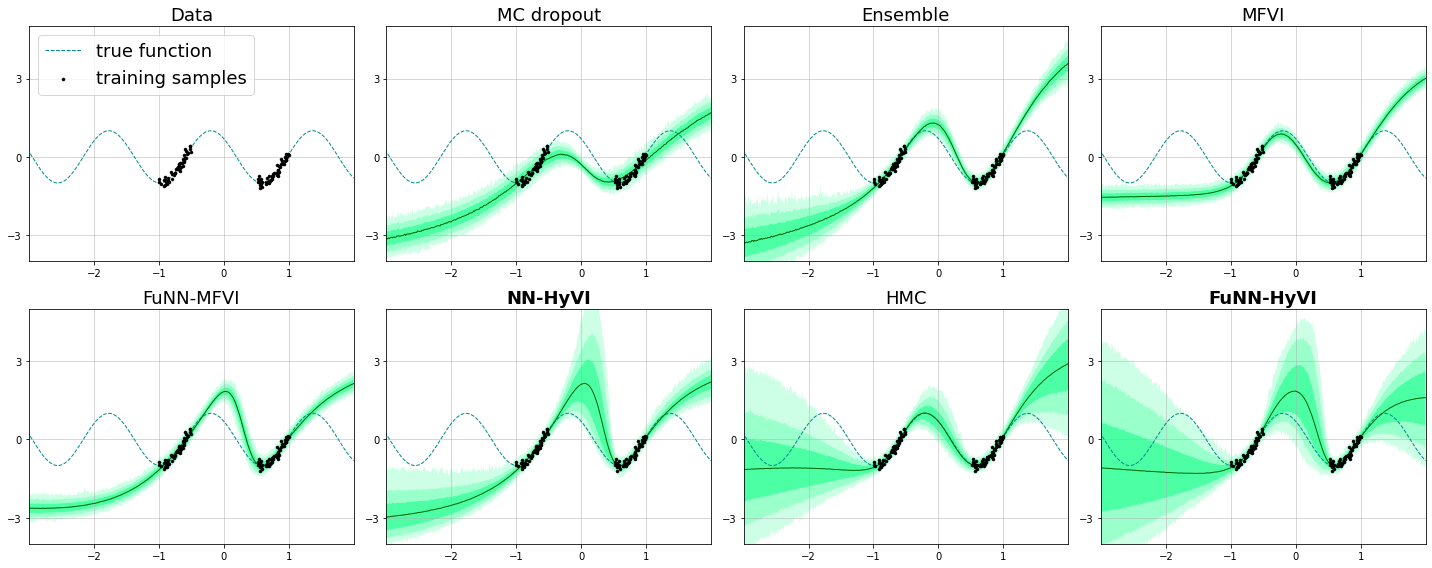

In [28]:
from pylab import *
fig, ax=plt.subplots(2,4, figsize=(20,8))


method_names=['MC dropout','Ensemble','MFVI','FuNN-MFVI','NN-HyVI','HMC','FuNN-HyVI']


parameters = {'axes.labelsize':18,
              'axes.titlesize': 18,
              'xtick.labelsize' : 18,
              'ytick.labelsize' : 18,
              'figure.titlesize':14}

plt.rcParams.update(parameters)

ax.flat[0].plot(x_pred.cpu(), torch.cos(4.0*(x_pred+0.2)).cpu(),'--', linewidth=1., color='darkcyan', label='true function')

ax.flat[0].set_yticks([-3,0,3])
ax.flat[0].set_xticks([-2,-1,0,1])
ax.flat[0].grid(True, which='major', linewidth=0.5)
ax.flat[0].set_ylim(-4, 5)
ax.flat[0].set_xlim(-3.,2.)
ax.flat[0].set_title('Data')
ax.flat[0].scatter(x_train.cpu(), y_train.cpu() , marker='.', linewidth=.5,  label='training samples',color='black',zorder=4)
ax.flat[0].legend(loc='upper left', prop={'size': 18})
i=1
for method in methods:
    y=Wave[method]
    PlotFoong(ax.flat[i],method_names[i-1],y)
    i+=1

fig.tight_layout()#h_pad=3., w_pad=3.)
plt.savefig('Results/NEW/WAVE.pdf', dpi=600)


# Isotropic Gaussian example #

In [29]:
from torch.distributions import MultivariateNormal as MV

N=200
#certain=MV(torch.zeros(N), covariance_matrix=0.1*torch.eye(N))
uncertain=MV(torch.zeros(N), covariance_matrix=.1*torch.eye(N))
sigmas=torch.linspace(0.03, .35, 20)
uTm=torch.Tensor(20)
cTm=torch.Tensor(20)
mTu=torch.Tensor(20)
mTc=torch.Tensor(20)
for i in range(20):
    middle=MV(torch.zeros(N), covariance_matrix=sigmas[i]*torch.eye(N))
    uTm[i]=torch.distributions.kl.kl_divergence(uncertain,middle)
#    cTm[i]=torch.distributions.kl.kl_divergence(certain,middle)
    mTu[i]=torch.distributions.kl.kl_divergence(middle,uncertain)
#    mTc[i]=torch.distributions.kl.kl_divergence(middle,certain)


/home/yann/anaconda3/envs/bnn/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
uTm, cTm

(tensor([1.1294e+02, 3.7644e+01, 1.1901e+01, 2.5244e+00, 3.5950e-02, 8.4497e-01,
         3.3481e+00, 6.7487e+00, 1.0621e+01, 1.4725e+01, 1.8920e+01, 2.3124e+01,
         2.7286e+01, 3.1376e+01, 3.5377e+01, 3.9279e+01, 4.3078e+01, 4.6771e+01,
         5.0360e+01, 5.3848e+01]),
 tensor([ 1.4612e+26,  4.5609e-41, -1.7634e+12,  3.0618e-41,  1.2644e+11,
          3.9201e+00, -9.2935e+10,  4.0633e+00,  0.0000e+00,  1.8750e+00,
          6.8664e-44,  0.0000e+00, -2.6340e+12,  3.0618e-41, -2.4461e+12,
          3.0618e-41,  1.2644e+11,  3.9201e+00, -9.2935e+10,  4.0633e+00]))

In [31]:
from pylab import *
import matplotlib.pyplot as plt

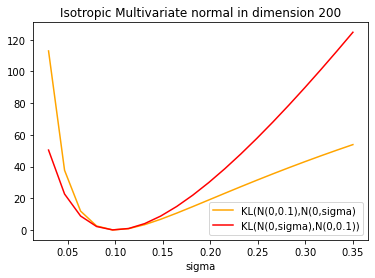

In [161]:
plt.plot(sigmas,uTm, label='KL(N(0,0.1),N(0,sigma)', color='orange')
plt.plot(sigmas,mTu, label='KL(N(0,sigma),N(0,0.1))',color='red')

#plt.plot(sigmas,cTm, label='KL(N(0,0.1),N(0,sigma))',color='blue')
#plt.plot(sigmas,mTc, label='KL(N(0,sigma),N(0,0.1))', color='green')

plt.xlabel('sigma')
plt.title('Isotropic Multivariate normal in dimension {}'.format(N))
plt.legend()

In [100]:
from torch.distributions import MultivariateNormal as MV

N=200
small=0.1
medium=0.5
large=2.
certain=MV(torch.zeros(N), covariance_matrix=small*torch.eye(N))
middle=MV(torch.zeros(N), covariance_matrix=medium*torch.eye(N))
uncertain=MV(torch.zeros(N), covariance_matrix=large*torch.eye(N))
print('KL(N(0,large*I),N(0,medium*I): {}'.format(torch.distributions.kl.kl_divergence(uncertain,middle)))
print('KL(N(0,sigma),N(0,1)): {}'.format(torch.distributions.kl.kl_divergence(middle,uncertain)))
print('mean: {}'.format(0.5*torch.distributions.kl.kl_divergence(uncertain,middle)+0.5*torch.distributions.kl.kl_divergence(middle,uncertain)))
print('KL(N(0,0.1),N(0,sigma)): {}'.format(torch.distributions.kl.kl_divergence(certain,middle)))
print('KL(N(0,sigma),N(0,0.1)): {}'.format(torch.distributions.kl.kl_divergence(middle,certain)))
print('mean: {}'.format(0.5*torch.distributions.kl.kl_divergence(certain,middle)+0.5*torch.distributions.kl.kl_divergence(middle,certain)))

KL(N(0,large*I),N(0,medium*I): 161.37054443359375
KL(N(0,sigma),N(0,1)): 63.629425048828125
mean: 112.49998474121094
KL(N(0,0.1),N(0,sigma)): 80.94381713867188
KL(N(0,sigma),N(0,0.1)): 239.05618286132812
mean: 160.0
